In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
 
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 32.9 MB/s 
     |████████████████████████████████| 6.6 MB 60.1 MB/s 
     |████████████████████████████████| 163 kB 73.8 MB/s 


In [4]:
df  = pd.read_csv("drive/My Drive/Data/Reviews.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Checking for Null Values


In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#Inspecting Null Values
df[df['Summary'].isnull()]
df[df['ProfileName'].isnull()]
##Not droping records with null values as they have the text populated when Summary is Null. When ProfileName is null, UserID is populated. In both the cases, the reviews are relevant to the dataset.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
172462,172463,B001FA1L9I,AC9U70TRGPDGJ,NaN,0,0,5,1289520000,very good,came in proper packaging. Have loved British ...
297275,297276,B007OXJM6E,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...
306751,306752,B000RI1W8E,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


Checking for Duplicates

In [9]:
duplicate = df[df.duplicated(subset=['UserId', 'Time', 'Score', 'Text'], keep=False)]

In [10]:
duplicate.shape

(232352, 10)

In [11]:
duplicate[duplicate['UserId']=='A3PJZ8TU8FDQ1K']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
467,468,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
602,603,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1237075200,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the..."
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
...,...,...,...,...,...,...,...,...,...,...
550311,550312,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...
550418,550419,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
550446,550447,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1237075200,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the..."
550447,550448,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."


Reviews with the same UserId, Review and Score posted at the same time can be considered as duplicates. There are rows duplicated for the same product ID and there are reviews which have different product ID. Reviews with different product ID posted at the same time can be considered as duplicates as review that is published for a version of prodcut is reproduced for every other variety in the products

In [12]:
df.drop_duplicates(subset=['UserId', 'Time', 'Score', 'Text'],keep='first',inplace=True)

Number of Reviews after removing duplicates

In [13]:
df.shape

(393967, 10)

Exploratory Data Analysis



Text(0, 0.5, 'Count of Reviews')

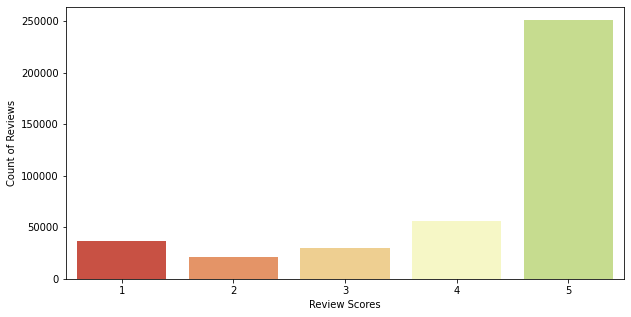

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Score'], palette=sns.color_palette("RdYlGn", 7))
plt.xlabel('Review Scores')
plt.ylabel('Count of Reviews')

We can observe that a significant number of reviews are 5 stars.








dict_values([250956, 56113, 36305, 29784, 20809])


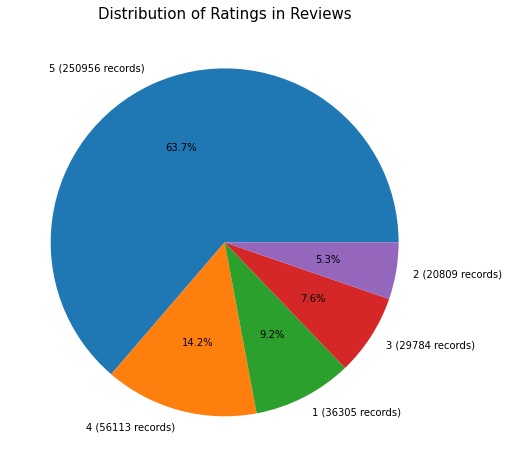

In [15]:
# Pie chart
labels = [f'{k} ({df["Score"].value_counts()[k]} records)' for k in df['Score'].value_counts().keys()]
sizes = dict(df['Score'].value_counts()).values()
print(sizes)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set_title("Distribution of Ratings in Reviews",fontsize=15)
plt.show();

**VADER - Valence Aware Dictionary and sEntiment Reasoner.** VADER is a type of sentiment analysis that relies on lexicons of sentiment-related words. 

Every word in the lexicon is evaluated using this process to determine if it is positive or negative and, if so, how +ve or -ve. 
 
When VADER looks at a piece of text, it checks to see whether any of the terms are recognized in the lexicon. For instance in the sentence, "The food is fantastic, and the environment is awesome", the terms "amazing" and "great" are present in the lexicon with score of 1.9 and 1.8 respectively.

VADER generates four sentiment metrics - +ve, neutral, -ve and compound score.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [17]:
df = df.head(5000)
print(df.shape)
## Considering only 5000 samples since Roberta model is taking a lot of time

(5000, 10)


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [19]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  result[row['Id']] = sid.polarity_scores(row['Text'])

100%|██████████| 5000/5000 [00:04<00:00, 1156.86it/s]


In [20]:
vader = pd.DataFrame(result).T
vader

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
5011,0.000,0.662,0.338,0.9506
5012,0.000,0.840,0.160,0.8472
5013,0.027,0.878,0.095,0.8336
5014,0.037,0.792,0.172,0.7897


In [21]:
vader = vader.reset_index().rename(columns = {'index':'Id'})
vader

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,5011,0.000,0.662,0.338,0.9506
4996,5012,0.000,0.840,0.160,0.8472
4997,5013,0.027,0.878,0.095,0.8336
4998,5014,0.037,0.792,0.172,0.7897


In [22]:
vader = vader.merge(df, how='left')
vader

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5011,0.000,0.662,0.338,0.9506,B000KOWNHE,A2ZMZU5LQP9NIA,"Arlene ""AH""",0,0,5,1218931200,BEST Gravy ever!,This is the best ever. Just add HOT water and...
4996,5012,0.000,0.840,0.160,0.8472,B000KOWNHE,A1QU292HLS3FCF,Shirlene Ross,0,0,5,1209945600,Pioneer Brand Peppered Gravy Mix,"<a href=""http://www.amazon.com/gp/product/B000..."
4997,5013,0.027,0.878,0.095,0.8336,B000HDKZDC,A23TNRHKURH7YU,Stephanie Newcomb,4,4,5,1242864000,Best cereal bars on the planet,We use these for our daughter for a few reason...
4998,5014,0.037,0.792,0.172,0.7897,B000HDKZDC,ADLW3LV9MZRUY,"Daniel Robbins ""Ninja""",4,4,5,1195603200,Yummy,These are really excellent breakfast bars. Not...


VADER results

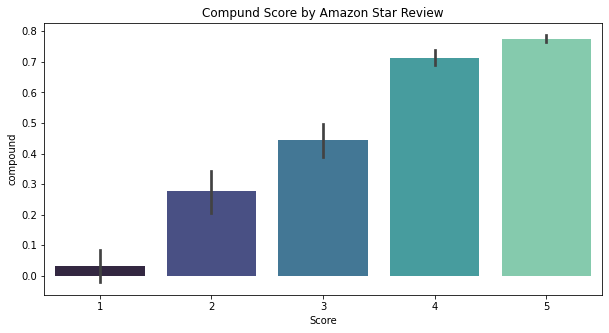

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Score',y = 'compound',data = vader,palette = "mako")
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

Barplot - Shows point estimates and errors as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

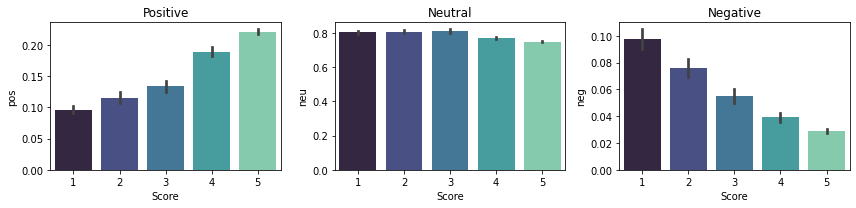

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(x = 'Score',y = 'pos',data = vader,palette = "mako", ax=axs[0]) 
sns.barplot(x = 'Score',y = 'neu',data = vader,palette = "mako", ax=axs[1]) 
sns.barplot(x = 'Score',y = 'neg',data = vader,palette = "mako", ax=axs[2]) 
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Here we can assume that reviews with low scores are mostly negative and reviews with hgiher scores are mostly positive. In the results, reviews with low scores are identified as negative where as reviews with higher scores are identified as positive.

[
Twitter-roBERTa-base for Sentiment Analysis](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment)

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English 

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [27]:
example = df['Text'][251]

In [28]:
example

'The pork chops from Omaha Steaks were very tasty but at the same time exceptionally dry. Pork is usually dry meat but these were to the extreme. Possibly shipping them frozen and keeping them frozen was partly the problem.'

In [29]:
encoded_input = tokenizer(example, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.19499946, 'roberta_neu': 0.4160274, 'roberta_pos': 0.3889731}


In [30]:
#Running example on Vader model
sid.polarity_scores(example)

{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'compound': -0.4823}

In [31]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
  return scores_dict

In [32]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    id = row['Id']
    vader_result = sid.polarity_scores(row['Text'])
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(row['Text'])
    both = {**vader_result_rename, **roberta_result}
    res[row['Id']] = both
  except RuntimeError:
    print(f'Broke for id {id}')

  2%|▏         | 81/5000 [00:23<15:34,  5.26it/s]

Broke for id 83


  4%|▎         | 187/5000 [00:53<13:33,  5.92it/s]

Broke for id 187


 11%|█         | 527/5000 [02:33<29:50,  2.50it/s]

Broke for id 529


 11%|█         | 540/5000 [02:36<12:20,  6.02it/s]

Broke for id 540


 15%|█▍        | 743/5000 [03:39<32:56,  2.15it/s]

Broke for id 746


 17%|█▋        | 862/5000 [04:13<14:24,  4.78it/s]

Broke for id 863


 21%|██        | 1050/5000 [05:10<16:27,  4.00it/s]

Broke for id 1053


 21%|██▏       | 1069/5000 [05:15<11:47,  5.56it/s]

Broke for id 1070


 23%|██▎       | 1155/5000 [05:39<09:55,  6.46it/s]

Broke for id 1156


 26%|██▋       | 1318/5000 [06:24<17:30,  3.51it/s]

Broke for id 1321


 27%|██▋       | 1372/5000 [06:38<33:31,  1.80it/s]

Broke for id 1375


 30%|██▉       | 1495/5000 [07:15<12:06,  4.83it/s]

Broke for id 1498


 31%|███▏      | 1572/5000 [07:39<35:25,  1.61it/s]

Broke for id 1575


 36%|███▌      | 1795/5000 [08:40<06:19,  8.43it/s]

Broke for id 1796


 36%|███▋      | 1825/5000 [08:49<12:27,  4.25it/s]

Broke for id 1826


 43%|████▎     | 2165/5000 [10:39<12:41,  3.72it/s]

Broke for id 2169


 45%|████▍     | 2244/5000 [11:02<10:57,  4.19it/s]

Broke for id 2248


 49%|████▉     | 2469/5000 [12:09<13:34,  3.11it/s]

Broke for id 2476


 50%|████▉     | 2487/5000 [12:17<08:16,  5.06it/s]

Broke for id 2492


 52%|█████▏    | 2577/5000 [12:44<08:57,  4.51it/s]

Broke for id 2584


 52%|█████▏    | 2603/5000 [12:51<16:09,  2.47it/s]

Broke for id 2610


 58%|█████▊    | 2888/5000 [14:15<10:34,  3.33it/s]

Broke for id 2897
Broke for id 2898


 58%|█████▊    | 2893/5000 [14:16<05:48,  6.04it/s]

Broke for id 2902


 58%|█████▊    | 2921/5000 [14:23<09:23,  3.69it/s]

Broke for id 2928


 59%|█████▊    | 2935/5000 [14:27<09:15,  3.72it/s]

Broke for id 2942
Broke for id 2944


 60%|██████    | 3011/5000 [14:51<08:12,  4.04it/s]

Broke for id 3022
Broke for id 3023


 60%|██████    | 3014/5000 [14:51<05:45,  5.74it/s]

Broke for id 3025


 66%|██████▌   | 3295/5000 [16:11<07:53,  3.60it/s]

Broke for id 3306


 76%|███████▌  | 3779/5000 [18:23<03:23,  5.99it/s]

Broke for id 3788


 79%|███████▉  | 3956/5000 [19:06<03:34,  4.87it/s]

Broke for id 3969


 82%|████████▏ | 4096/5000 [19:51<03:20,  4.50it/s]

Broke for id 4107


 82%|████████▏ | 4097/5000 [19:52<03:50,  3.92it/s]

Broke for id 4110


 86%|████████▌ | 4294/5000 [20:51<04:10,  2.82it/s]

Broke for id 4307


 86%|████████▌ | 4303/5000 [20:55<05:57,  1.95it/s]

Broke for id 4316


 88%|████████▊ | 4397/5000 [21:20<01:59,  5.06it/s]

Broke for id 4408


 89%|████████▉ | 4472/5000 [21:39<01:16,  6.89it/s]

Broke for id 4483


 90%|████████▉ | 4499/5000 [21:48<02:11,  3.82it/s]

Broke for id 4512


 91%|█████████ | 4540/5000 [22:04<02:34,  2.97it/s]

Broke for id 4553


 91%|█████████▏| 4570/5000 [22:19<04:15,  1.68it/s]

Broke for id 4583


100%|██████████| 5000/5000 [24:34<00:00,  3.39it/s]


In [41]:
results_final = pd.DataFrame(res).T
results_final = results_final.reset_index().rename(columns={'index':'Id'})
results_final = results_final.merge(df, how='left')

In [42]:
results_final.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

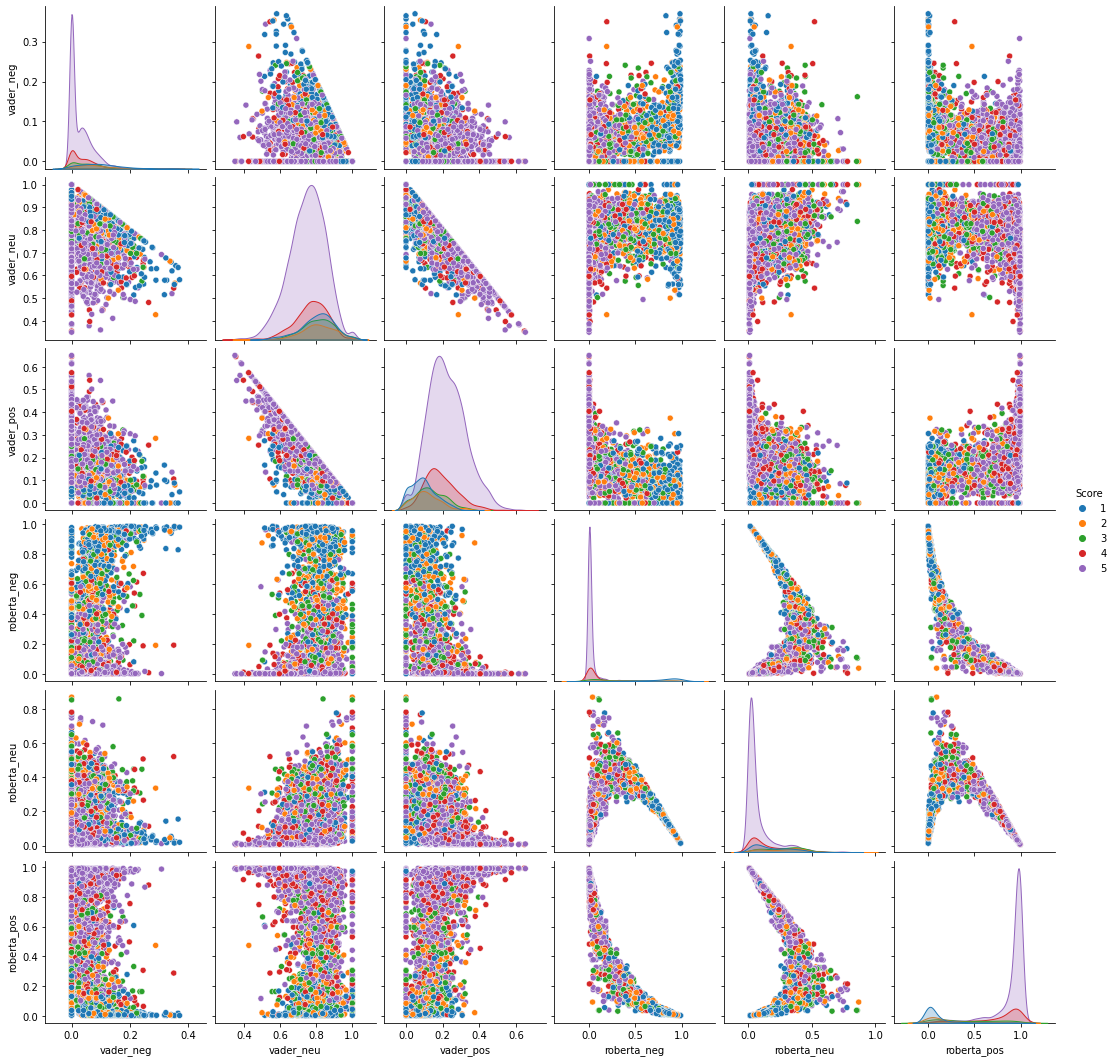

In [47]:
sns.pairplot(data=results_final,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

RoBERTa-base model has identified positive reviews with 5 scores more confidently. In RoBERTa model, the reviews with 5 scores is assigned higher positivity score as compared to that of VADER model. Most of the lesser star reviews are very low in positivity

Examples - looking at 1 star positive reviews and 5 star negative reviews

In [59]:
results_final.query('Score==1').sort_values('roberta_pos', ascending =False)['Text'].values[1]

'You can get these SOOOOOOOOOOOOO much cheaper at wholesale clubs.<br /><br />I get the 24/20oz(yes 20oz!) for $11 or $12!! Its actually even cheaper then buying the bottles from the regular store!'

In [54]:
results_final.query('Score==1').sort_values('vader_pos', ascending =False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [60]:
results_final.query('Score==5').sort_values('roberta_neg', ascending =False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [61]:
results_final.query('Score==5').sort_values('vader_neg', ascending =False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'